In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
import os
%matplotlib inline
sns.set_style('white')

In [2]:
os.chdir('C:\\Users\\liuth\Documents\\Python Scripts\\ThinkfulProjects\Data')

In [3]:
df = pd.read_csv('Autism_Data.csv', encoding='latin1')

---

Exploring and Cleaning the Dataset

In [4]:
#Converting yes/no to 1/0 respectively
conversion = {'yes': 1, 'no': 0, 'YES': 1, 'NO': 0}
df['jundice'] = df['jundice'].map(conversion)
df['austim'] = df['austim'].map(conversion)
df['used_app_before'] = df['used_app_before'].map(conversion)
df['Class/ASD'] = df['Class/ASD'].map(conversion)

In [5]:
#Converting f/m to 1/0 respectively
trans = {'f': 0, 'm': 1}
df['gender'] = df['gender'].map(trans)

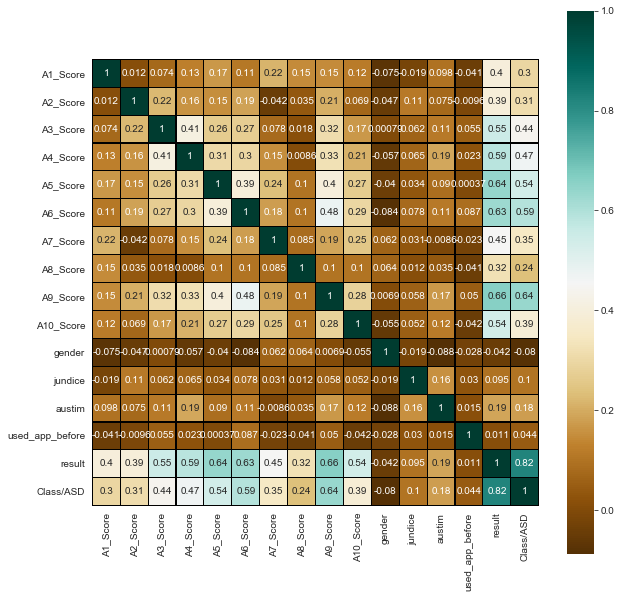

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.1, square=True, cmap = "BrBG", linecolor='black', annot=True, ax=ax)

In [7]:
df.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,0,White-European,0,0,'United States',0,6,'18 and more',Self,0
1,1,1,0,1,0,0,0,1,0,1,...,1,Latino,0,1,Brazil,0,5,'18 and more',Self,0
2,1,1,0,1,1,0,1,1,1,1,...,1,Latino,1,1,Spain,0,8,'18 and more',Parent,1
3,1,1,0,1,0,0,1,1,0,1,...,0,White-European,0,1,'United States',0,6,'18 and more',Self,0
4,1,0,0,0,0,0,0,1,0,0,...,0,?,0,0,Egypt,0,2,'18 and more',?,0


In [8]:
print(df.columns)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')


In [9]:
del df['ethnicity']

In [10]:
del df['contry_of_res']

In [17]:
del df['age_desc']

In [20]:
del df['relation']

In [42]:
del df['age']

In [43]:
print(df.columns)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'jundice',
       'austim', 'used_app_before', 'result', 'Class/ASD'],
      dtype='object')


In [44]:
df.dtypes

A1_Score           int64
A2_Score           int64
A3_Score           int64
A4_Score           int64
A5_Score           int64
A6_Score           int64
A7_Score           int64
A8_Score           int64
A9_Score           int64
A10_Score          int64
gender             int64
jundice            int64
austim             int64
used_app_before    int64
result             int64
Class/ASD          int64
dtype: object

---

Creating Training and Test Sets

In [45]:
# Scale everything down
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)# Ridge regression
ridg = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgfit = ridg.fit(X_train, Y_train)

# See the results for the training set
print('R-squared for ridge:', ridg.score(X_train, Y_train))
print('\nParameter estimates for ridge:')
print(np.append(ridgfit.coef_, ridgfit.intercept_))

# See the results for the test set
print('R-squared for ridge (test):', ridg.score(X_test, Y_test))

C:\Users\liuth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
# Create our training and testing data
trainsize = int(df.shape[0] / 2)
df_train = df.iloc[:trainsize, :].copy()
df_test = df.iloc[trainsize:, :].copy()

# Create our Xs and Ys
Y_train = df_train['austim'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['austim'])]

Y_test = df_test['austim'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_train.columns).isin(['austim'])]

In [47]:
linear = linear_model.LinearRegression()
linearfit = linear.fit(X_train, Y_train)

# See the results for the training set
print('R-squared for linear regression:', linear.score(X_train, Y_train))
print('\nParameter estimates for linear regression:')
print(np.append(linearfit.coef_, linearfit.intercept_))

# See the results for the test set
print('R-squared for linear regression (test):', linear.score(X_test, Y_test))

R-squared for linear regression: 0.09289722902786524

Parameter estimates for linear regression:
[ 8.86732095e+12  9.84823135e+12  9.85580616e+12  9.89143784e+12
  9.89175719e+12  8.92201198e+12  9.75659168e+12  9.44145903e+12
  9.25770710e+12  9.78326565e+12 -1.12639224e-01  1.38371909e-01
 -9.84760529e-02 -4.94533649e+13  8.39625372e-02  5.60342576e-02]
R-squared for linear regression (test): 0.005088000672237802


In [48]:
# Ridge regression
ridg = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgfit = ridg.fit(X_train, Y_train)

# See the results for the training set
print('R-squared for ridge:', ridg.score(X_train, Y_train))
print('\nParameter estimates for ridge:')
print(np.append(ridgfit.coef_, ridgfit.intercept_))

# See the results for the test set
print('R-squared for ridge (test):', ridg.score(X_test, Y_test))

R-squared for ridge: 0.09151614737324108

Parameter estimates for ridge:
[ 0.031294   -0.0201675  -0.01729329  0.18493167 -0.0827932  -0.05116439
 -0.11596474  0.01563508  0.03671965  0.07135809 -0.11057408  0.12490437
 -0.09375899  0.01044364  0.0832599   0.        ]
R-squared for ridge (test): 0.024473973074812916


In [49]:
# Lasso regression
lass = linear_model.Lasso(alpha=0.5)
lassfit = lass.fit(X_train, Y_train)

# See the results for the training set
print('R-squared for lasso:', lass.score(X_train, Y_train))
print('\nParameter estimates for lasso:')
print(np.append(lassfit.coef_, lassfit.intercept_))

# See the results for the test set
print('R-squared for lasso (test):', lass.score(X_test, Y_test))

R-squared for lasso: 0.0

Parameter estimates for lasso:
[ 0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.         -0.          0.
 -0.          0.          0.          0.04657381]
R-squared for lasso (test): -0.009695512820512953


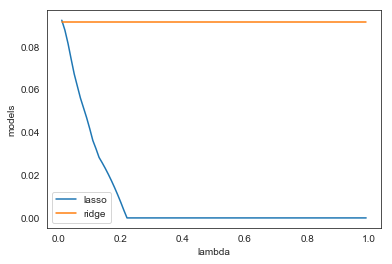

In [50]:
# Ridge plot

results = pd.DataFrame(columns=["lasso", "ridge", "lambda"])

for lambd in np.arange(0.01,1,0.01):
    lass = linear_model.Lasso(alpha=lambd)
    lass.fit(X_train, Y_train)
    lass_score = lass.score(X_train, Y_train)
    
    ridgeregr = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregr.fit(X_train, Y_train)
    ridgeregr_score = ridgeregr.score(X_train, Y_train)
    
    res = pd.DataFrame([[lass_score, ridgeregr_score, lambd]], columns=["lasso", "ridge", "lambda"])

    results = results.append(res)

plt.plot(results['lambda'], results['lasso'])
plt.plot(results['lambda'], results['ridge'])
plt.xlabel('lambda')
plt.ylabel('models')
plt.legend(["lasso", "ridge"])
plt.show()

---

Let's see what happens when we apply this to a decision tree and random forest